In [1]:

library(raster)
library(tidyverse)
library(dplyr)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(data.table)

library(fs)
library(sf)
#library(rgdal)

#library(rgeos)
library(mapproj)
#library(rgee)
library(viridis)
#library(wesanderson)
library(scales)
library(tools)
library(patchwork)

library(rnaturalearth)
library(rnaturalearthdata)

out_ext = '.png'
out_ext_type = 'png'
#conda install -c conda-forge r-rnaturalearth r-rnaturalearthdata r-mapproj r-rgeos r-viridis r-wesanderson r-patchwork r-aws.s3 r-feather r-rockchalk

Loading required package: sp
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not a

In [2]:
library(ggspatial)

In [3]:
source('/home/pmontesa/code/3dsi/boreal_map_functions.R') 

[1] "ADAPT, EXPLORE"
[1] "ADAPT, EXPLORE"


In [4]:
MAINDIR = '/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm'
out_ext = '.png'
out_ext_type = 'PNG'

### CHM footprints

In [5]:
footprint_gdf_chm = st_read(paste0(MAINDIR,'/dm_10m/footprints/footprints_chm_20231023_vhrmeta.gpkg'))

Multiple layers are present in data source /panfs/ccds02/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m/footprints/footprints_chm_20231023_vhrmeta.gpkg, reading layer `footprints_chm_20231023._vhrmeta'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in evalq((function (..., call. = TRUE, immediate. = FALSE, noBreaks. = FALSE, :
“automatically selected the first layer in a data source containing more than one.”

Reading layer `footprints_chm_20231023._vhrmeta' from data source `/panfs/ccds02/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m/footprints/footprints_chm_20231023_vhrmeta.gpkg' using driver `GPKG'
Simple feature collection with 946 features and 23 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -179.0458 ymin: 51.23662 xmax: 176.2521 ymax: 71.52705
Geodetic CRS:  WGS 84


### Validation intersections of CHM footprints and LVIS footprints

In [6]:
foot_intersect_chm_lvis = st_read(paste0(MAINDIR, '/dm_10m/validate/val_intersect_footprints_LVIS_20231023.gpkg'))
foot_intersect_chm_lvis = foot_intersect_chm_lvis %>%
        tidyr::separate(file_2, sep="_ABoVE", into = c('val_source','junk'), remove=FALSE) %>%
        mutate(catid = str_replace_all(catid, pattern = "-chm-dm-10m.tif$", replacement = "")) %>%
        mutate(val_source = factor(val_source)) %>%
        select(-c(junk,dn,file_1))
head(foot_intersect_chm_lvis)

Reading layer `val_intersect_footprints_LVIS_20231023' from data source `/panfs/ccds02/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m/validate/val_intersect_footprints_LVIS_20231023.gpkg' using driver `GPKG'
Simple feature collection with 2968 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -166.8798 ymin: 57.93492 xmax: -139.9038 ymax: 71.44323
Geodetic CRS:  WGS 84


Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson
Warning message:
“multiple methods tables found for ‘elide’”

footprint_name,path_1,area_km2,area_ha,type,catid,sensor,year,month,date,file_2,val_source,path_2,geom
WV02_20140802_M1BS_10300100342CF900-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,2979.047,297904.7,cnn-chm-v1,10300100342CF900,WV02,2014,8,2014-08-02 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.259 59...
WV02_20180701_M1BS_103001007F059300-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,2027.786,202778.6,cnn-chm-v1,103001007F059300,WV02,2018,7,2018-07-01 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.259 59...
WV02_20180701_M1BS_1030010080C0E600-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,2064.707,206470.7,cnn-chm-v1,1030010080C0E600,WV02,2018,7,2018-07-01 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.259 59...
WV03_20200729_M1BS_104001005E8CBF00-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,1339.070,133907.0,cnn-chm-v1,104001005E8CBF00,WV03,2020,7,2020-07-29 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.3418 5...
WV03_20190817_M1BS_1040010051769700-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,1344.574,134457.4,cnn-chm-v1,1040010051769700,WV03,2019,8,2019-08-17 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.259 59...
WV02_20140727_M1BS_1030010035895F00-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,2782.067,278206.7,cnn-chm-v1,1030010035895F00,WV02,2014,7,2014-07-27 01:00:00,LVISF2_ABoVE2019_0723_R2003_066782_lvis_pt_cnt_30m.tif,LVISF2,/att/nobackup/pmontesa/userfs02/data/LVIS/2019/output/metrics/30,MULTIPOLYGON (((-155.4187 5...


### Training chips

In [10]:
chips_ifsar_train = st_read(paste0(MAINDIR,'/chips_df_ifsar_chm_nodtm_v20231014.gpkg'))
chips_ifsar_train$chip_source = 'ifsar'
chips_lidar_train = st_read(paste0(MAINDIR,'/chips_df_lidar_nodtm_v20231014.gpkg'))
chips_lidar_train$chip_source = 'lidar'
chips_train = rbind(chips_ifsar_train %>% dplyr::select(baseName,chipName,groupName,chip_source), chips_lidar_train %>% dplyr::select(baseName,chipName,groupName,chip_source)) %>% st_centroid()
head(chips_train)

ERROR: Error: Cannot open "/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/chips_df_ifsar_chm_nodtm_v20231014.gpkg"; The file doesn't seem to exist.


In [11]:
# Train/non-train strips
nontrain_strips_df = read_csv(paste0(MAINDIR,'/nontrain_strips_0708_arcBorC_v20231017.csv'))
train_strips_df = read_csv(paste0(MAINDIR,'/train_strips_0708_arcBorC_v20231017.csv'))
strips_df = rbind(nontrain_strips_df, train_strips_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  srlitePath = col_character()
)

── Column specification ────────────────────────────────────────────────────────
cols(
  srlitePath = col_character()
)


In [12]:
# strips_df = strips_df %>% 
#     separate(srlitePath, into = c('name', 'junk'), sep = "\\-") #%>%
#       #select(-junk)
# head(strips_df)

In [21]:
stats_smry_df = read_csv(paste0(MAINDIR,'/dm_10m/validate/stats_footprint_smry_LVISRH080_RH085_RH090.csv'))

Warning message:
“Missing column names filled in: 'X1' [1]”
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  footprint_name = col_character(),
  ref_var = col_character(),
  type = col_character(),
  catid = col_character(),
  sensor = col_character(),
  date = col_date(format = ""),
  satid = col_character(),
  tlctime = col_datetime(format = ""),
  scandir = col_character(),
  srlite_metrics_class = col_character(),
  model_use_class = col_character()
)
ℹ Use `spec()` for the full column specifications.


In [22]:
head(stats_smry_df)
dim(stats_smry_df)

X1,footprint_name,n,slope,intercept,r_value,p_value,std_err,ref_var,r2score,...,sunel,az,el,intrack,crosstrack,offnadir,cloudcover,scandir,srlite_metrics_class,model_use_class
0,WV02_20100715_M1BS_10300100064B1E00,3216,0.1043700,0.08629152,0.4572040,6.699374e-166,0.0035811403,ht_m_ref_RH080,-0.21394051,...,46.6000,100.2571,71.68571,1.714286,16.1142857,16.22857,0.138,Forward,exclude NIR r2 < 0.5,test
1,WV02_20100804_M1BS_103001000617C000,740774,0.6459756,0.67846243,0.8707355,0.000000e+00,0.0004238708,ht_m_ref_RH080,0.71369055,...,44.9000,297.9000,69.18000,1.640000,-18.4800000,18.58000,0.000,Forward,include NIR r2 >= 0.5,train/test
2,WV02_20100824_M1BS_10300100066AFE00,444337,0.5239050,0.05146020,0.8072804,0.000000e+00,0.0005745774,ht_m_ref_RH080,0.56080061,...,34.6500,234.5250,69.78750,-15.300000,-9.2500000,17.83750,0.005,Forward,exclude NIR r2 < 0.5,test
3,WV02_20110727_M1BS_103001000D914900,1037606,0.2665019,-0.02977552,0.2665906,0.000000e+00,0.0009458690,ht_m_ref_RH080,-2.32112179,...,44.5500,196.1333,74.96667,-13.116667,0.8333333,13.15000,0.099,Forward,include NIR r2 >= 0.5,train/test
4,WV02_20110804_M1BS_103001000C140300,1050685,0.4084035,0.07458689,0.6347362,0.000000e+00,0.0004850510,ht_m_ref_RH080,-0.07411667,...,43.8100,205.0700,60.03000,-26.140000,-2.5800000,26.29000,0.218,Forward,exclude NIR r2 < 0.5,test
5,WV02_20110812_M1BS_103001000C8BBA00,500176,0.4905925,-0.09281429,0.5444087,0.000000e+00,0.0010688187,ht_m_ref_RH080,-0.19593676,...,41.8625,92.0875,77.67500,2.875000,10.5625000,10.95000,0.004,Forward,include NIR r2 >= 0.5,train/test


[1] 1314   35

In [15]:
# footprint_gdf_chm = footprint_gdf_chm %>% mutate(catid = str_replace_all(catid, 
#             pattern = "-chm-dm-10m.tif$", replacement = ""))
dim(footprint_gdf_chm)

[1] 946  24

In [29]:
footprint_gdf_chm_updated = footprint_gdf_chm %>%
    mutate(catid = str_replace_all(catid, 
            pattern = "-chm-dm-10m.tif$", replacement = ""))  
footprint_gdf_chm_updated = footprint_gdf_chm_updated%>%
    left_join(stats_smry_df, by = 'catid', keep = FALSE) %>%
    replace_na(list(model_use_class = "train")) %>%
    mutate(model_use_class = factor(model_use_class))

#footprint_gdf_chm_updated$model_use_class = factor(footprint_gdf_chm_updated$model_use_class, levels=c('train', 'test', 'apply'))

tail(footprint_gdf_chm_updated )
dim(footprint_gdf_chm_updated )

,file,footprint_name.x,path,area_km2,area_ha,type.x,catid,sensor.x,year.x,month.x,geom,...,az.y,el.y,intrack.y,crosstrack.y,offnadir.y,cloudcover.y,scandir.y,srlite_metrics_class,model_use_class,geom
1817,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,504.1358,50413.58,cnn-chm-v1,104001003F665100,WV03,2018,7,POLYGON ((-160.8135 67.8441...,...,306.05,58.65,3.20,-28.20,28.35,0.000,Forward,include NIR r2 >= 0.5,test,POLYGON ((-160.8135 67.8441...
1818,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,504.1358,50413.58,cnn-chm-v1,104001003F665100,WV03,2018,7,POLYGON ((-160.8135 67.8441...,...,306.05,58.65,3.20,-28.20,28.35,0.000,Forward,include NIR r2 >= 0.5,test,POLYGON ((-160.8135 67.8441...
1819,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,WV03_20180706_M1BS_104001003F665100-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,504.1358,50413.58,cnn-chm-v1,104001003F665100,WV03,2018,7,POLYGON ((-160.8135 67.8441...,...,306.05,58.65,3.20,-28.20,28.35,0.000,Forward,include NIR r2 >= 0.5,test,POLYGON ((-160.8135 67.8441...
1820,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,3321.9396,332193.96,cnn-chm-v1,103001006F1F3900,WV02,2017,8,POLYGON ((-149.9754 64.9374...,...,25.12,59.31,27.07,2.52,27.21,0.098,Forward,exclude NIR r2 < 0.5,test,POLYGON ((-149.9754 64.9374...
1821,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,3321.9396,332193.96,cnn-chm-v1,103001006F1F3900,WV02,2017,8,POLYGON ((-149.9754 64.9374...,...,25.12,59.31,27.07,2.52,27.21,0.098,Forward,exclude NIR r2 < 0.5,test,POLYGON ((-149.9754 64.9374...
1822,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,WV02_20170806_M1BS_103001006F1F3900-chm-dm-10m.tif,/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m,3321.9396,332193.96,cnn-chm-v1,103001006F1F3900,WV02,2017,8,POLYGON ((-149.9754 64.9374...,...,25.12,59.31,27.07,2.52,27.21,0.098,Forward,exclude NIR r2 < 0.5,test,POLYGON ((-149.9754 64.9374...


[1] 1822   58

In [30]:
levels(footprint_gdf_chm_updated$model_use_class)

[1] "test"       "train"      "train/test"

In [31]:
# https://www.r-bloggers.com/2019/04/zooming-in-on-maps-with-sf-and-ggplot2/
# # Original box
# CRS=crs_canalb
# disp_win_wgs84 <- st_sfc(st_point(c(-150, 55)), st_point(c(-150, 75)), crs = 4326)

CRS=3338
disp_win_wgs84 <- st_sfc(st_point(c(-170, 52.5)), st_point(c(-130, 70)), crs = 4326)

disp_win_trans <- st_transform(disp_win_wgs84, crs = CRS)
disp_win_coord <- st_coordinates(disp_win_trans)

add_theme_custom = list(
        coord_sf(xlim = disp_win_coord[,'X'], ylim = disp_win_coord[,'Y'], crs = CRS, expand = F),
        annotation_scale( location = "tl", width_hint = 0.125, style='ticks') ,
        theme_bw()
  )

add_theme_adjustments = list(
        theme(
            plot.background = element_rect(fill = NA, colour = 'black', size = 0.5),
        #legend.position = c(0.755 ,0.9), 
          legend.text=element_text(size=rel(0.5)), 
          legend.background = element_blank(),
          legend.box.background = element_rect(colour = "black"),
          axis.title.x = element_blank(), 
          axis.title.y = element_blank(),
          axis.text = element_text(size = 8),
          axis.text.y = element_text(angle=90, hjust = 0.5)
         )
    )


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

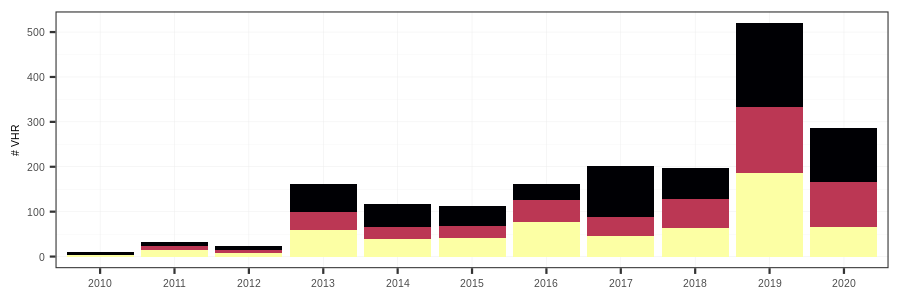

In [32]:
options(repr.plot.width =6, repr.plot.height = 2, repr.plot.res = 150)
p_hist = ggplot() + 
    geom_histogram(data = footprint_gdf_chm_updated  %>% as.data.frame(), 
            mapping = aes(x=factor(year.x), fill=model_use_class), stat='count',
           show.legend=FALSE)+
    scale_fill_viridis_d(direction = 1, option = "inferno", guide = guide_legend(override.aes = list(size = 0.1, alpha = 1) ) , name=NULL) +
    theme_bw() +
    theme(panel.grid = element_line(size=0.1)) +
    labs(x=NULL, y='# VHR') +
    theme(axis.text = element_text(size = 5), axis.title = element_text(size = 5))
p_hist

In [33]:
levels(factor(foot_intersect_chm_lvis$val_source))

[1] "LVIS2"  "LVISF2"

Reading layer `wwf_circumboreal_Dissolve' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/wwf_circumboreal_Dissolve.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers
Reading layer `ABoVE_Study_Domain' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/arc/ABoVE_Study_Domain_Final/ABoVE_Study_Domain.shp' using driver `ESRI Shapefile'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -3398275 ymin: 997535.1 xmax: 623682.7 ymax: 4562705
Projected CRS: Canada_Albers_Equal_Area_Conic


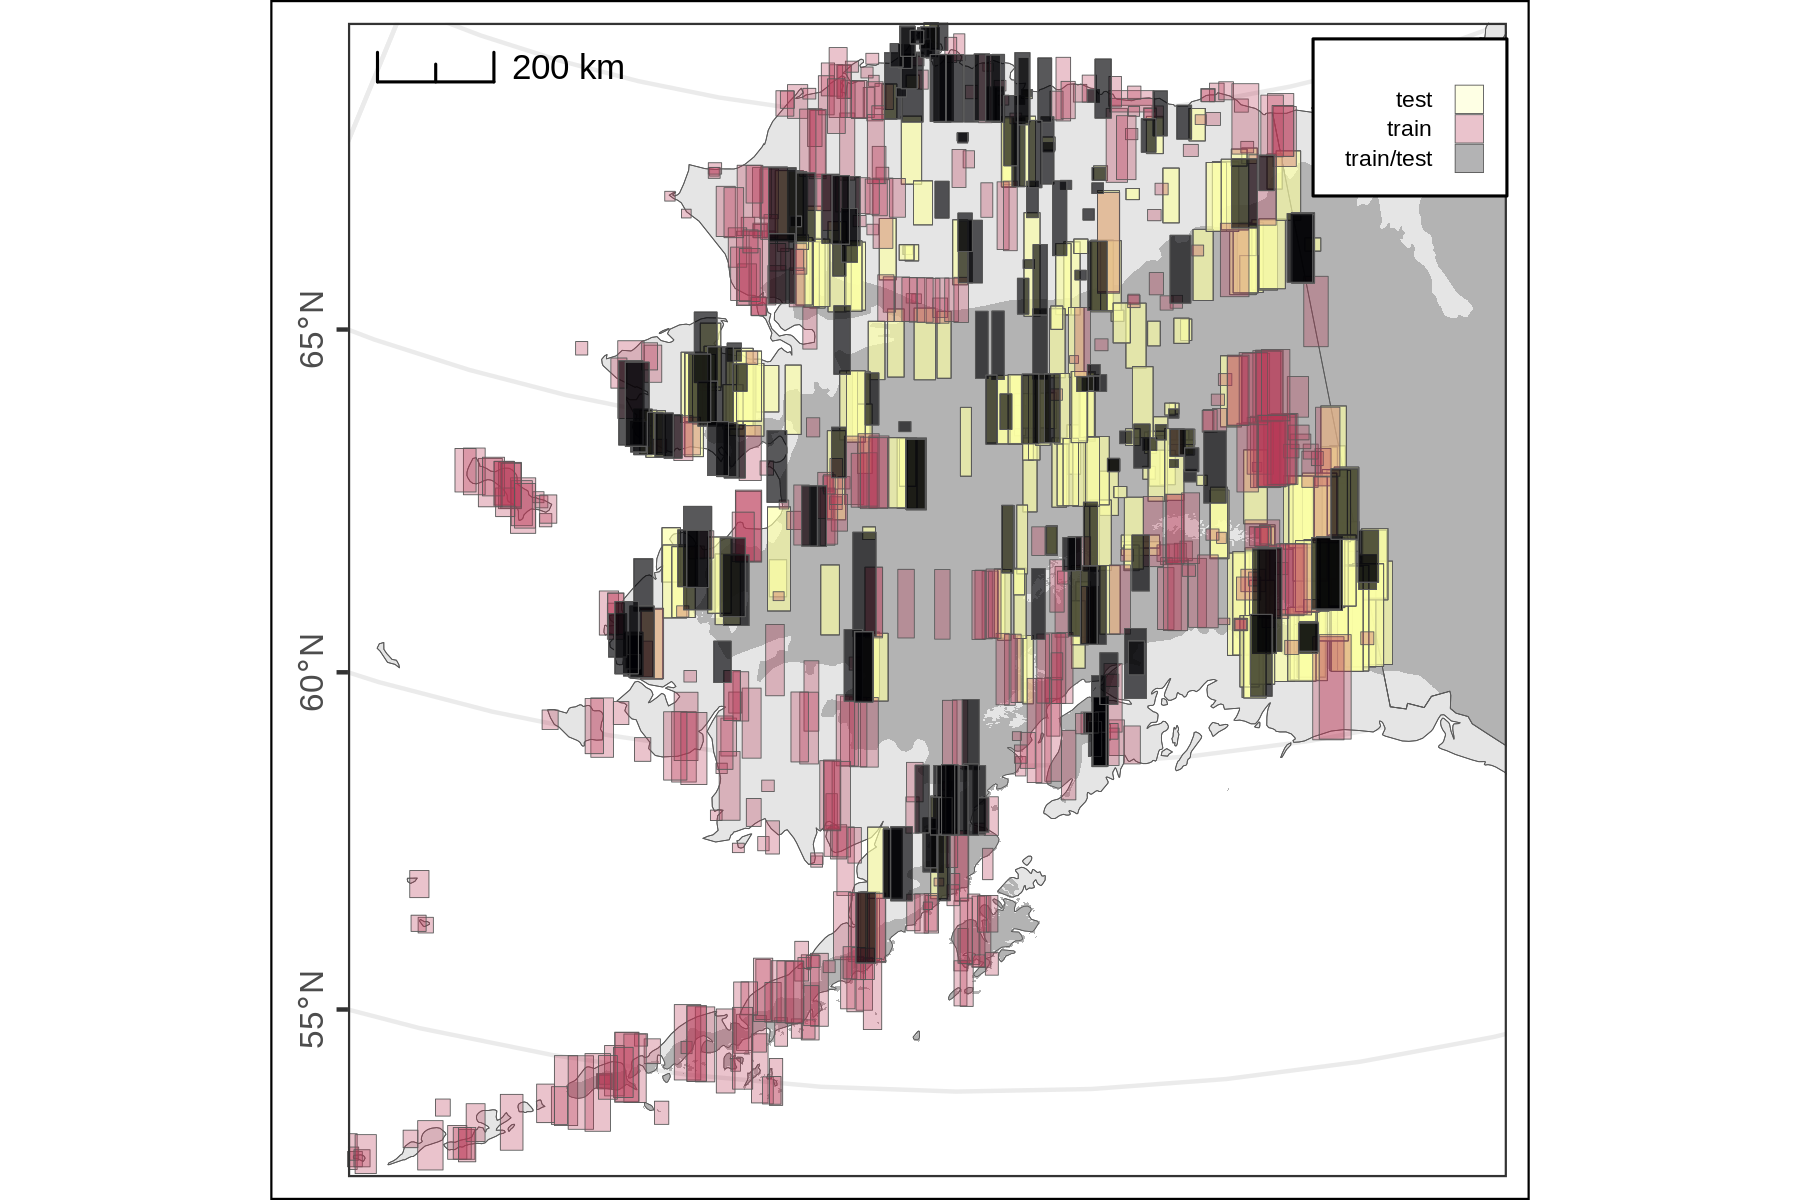

In [34]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m = do_map_above_boreal(ABOVE_DOMAIN=FALSE) + 
    geom_sf(data = footprint_gdf_chm_updated, 
            mapping = aes(fill=model_use_class),
            alpha=0.3, size=0.1, 
            #fill='dodgerblue', 
            #show.legend='polygon'
           ) +
    # geom_sf(data = foot_intersect_chm_lvis, aes(color=val_source), size=0.1, 
    #         #color='red', 
    #         show.legend='line'
    #    ) +
    add_theme_custom + 
    add_theme_adjustments +
    scale_fill_viridis_d(direction = -1, option = "inferno", guide = guide_legend(override.aes = list(size = 0.1, alpha = 1) ) , name=NULL)  +
    guides(fill=guide_legend(title=NULL, title.position = NULL, label.position = "left", keywidth = unit(.25, "cm"), keyheight = unit(.25, "cm"), ncol=1)) +
    theme(
        #legend.position = c(0.5 ,0.9), 
        legend.position=c(1,0.85),
        #legend.direction="horizontal",
        legend.justification=c(1,0),
         ) 
    # +
    # #scale_fill_manual(values=c("dodgerblue", "orange")) +
    # # scale_fill_manual(values = c("A" = "yellow"), name = NULL,
    # #                 guide = guide_legend(override.aes = list(linetype = "blank", shape = NA))) +
    # scale_colour_manual(values = c("LVIS2" = "pink", "LVIS2" = "purple"), name = NULL,
    #                   #guide = guide_legend(override.aes = list(linetype = c("blank", "solid"), 
    #                                                            #shape = c(16, NA)))
    # )
    
m

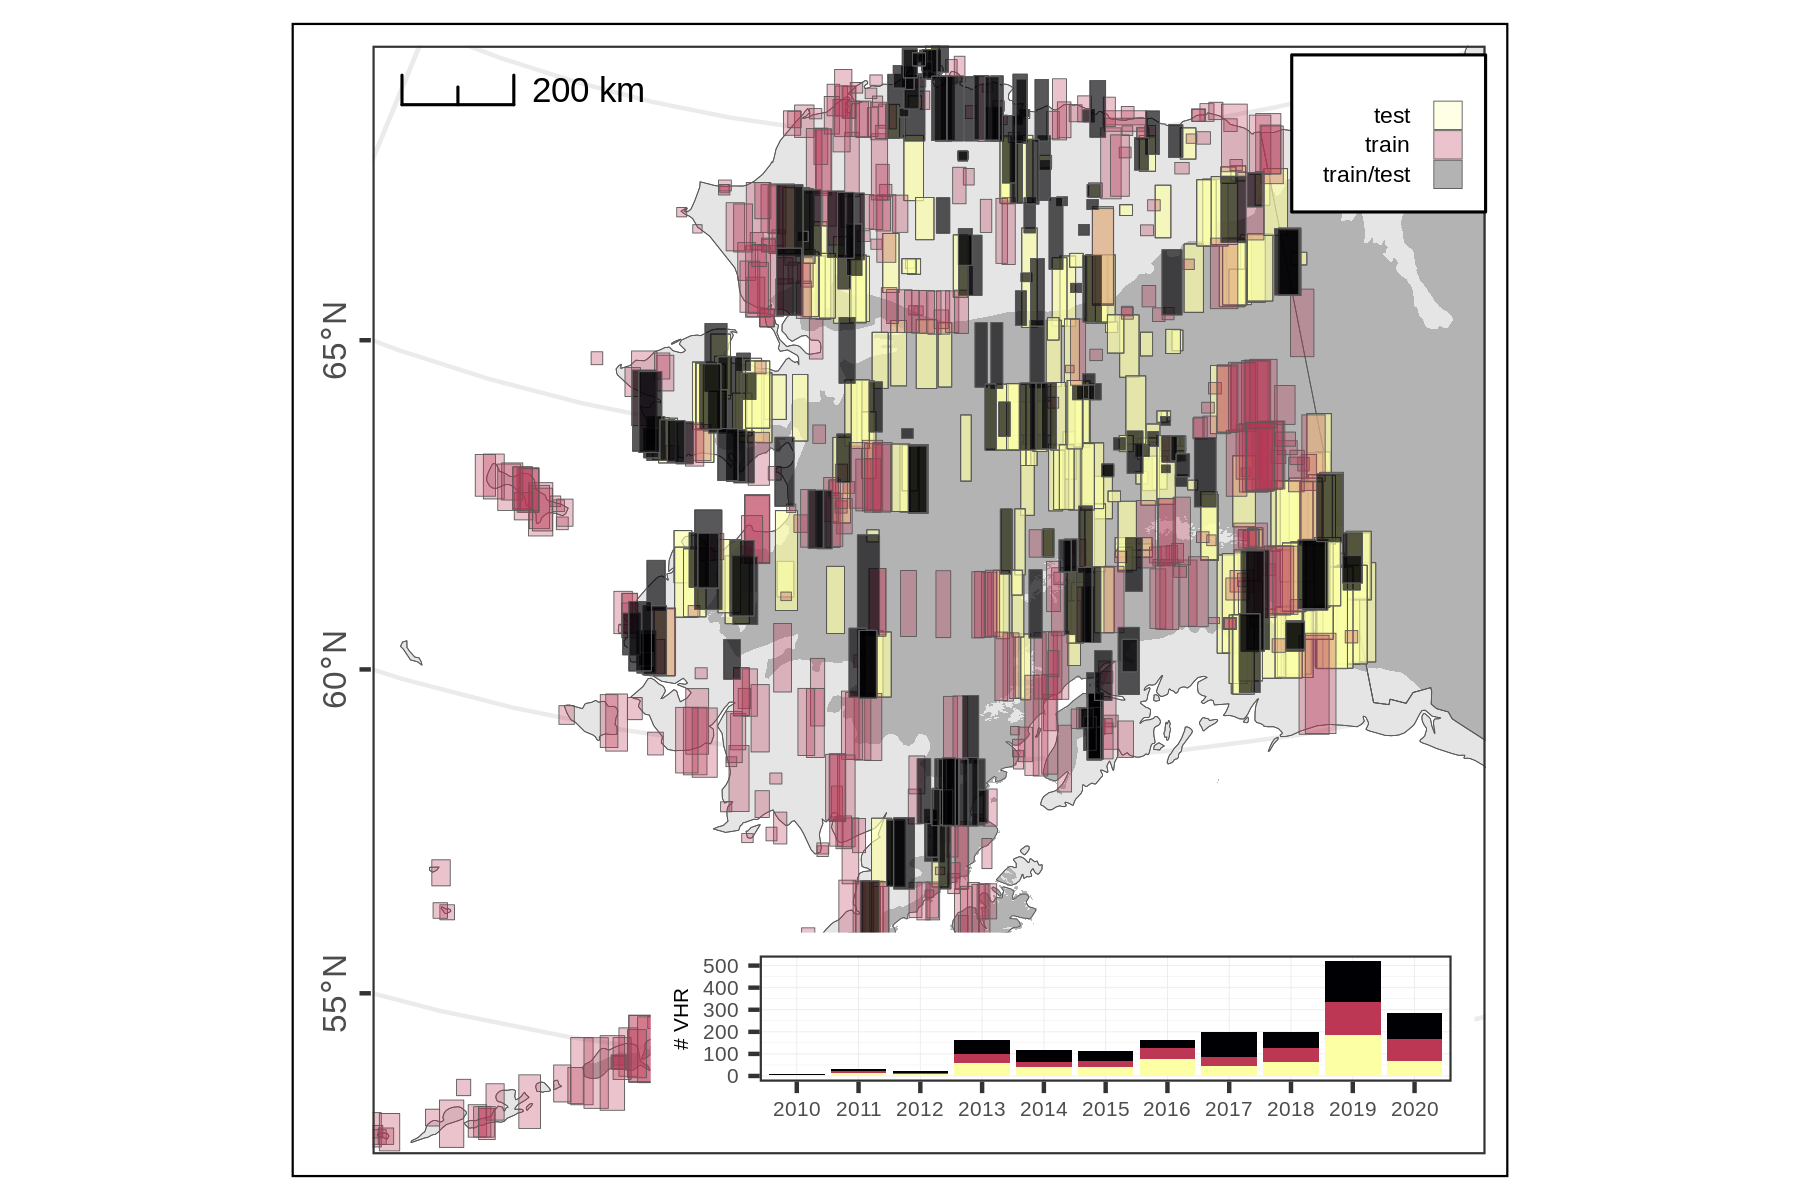

In [35]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

m_traintestapply = m + inset_element(p_hist, 0.25, 0.01, 0.99, 0.2) #+ plot_layout(guides = "collect") 
m_traintestapply

In [37]:
plot_name = paste0('map_traintestapply_', format(Sys.time(), "%Y%m%d"), out_ext)
out_map_fn = path(MAINDIR, '/dm_10m/validate/plots', plot_name)
ggsave(plot = m_traintestapply, file = out_map_fn,  dpi = 300, width = 6, height = 4)
out_map_fn

/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/20231014_chm/dm_10m/validate/plots/map_traintestapply_20231201.png

In [265]:
m + 
geom_sf(data=st_intersection(chips_train %>% st_transform(crs = st_crs(footprint_gdf_chm)) %>% st_centroid(), footprint_gdf_chm), size=0.1) +
add_theme_custom

Warning message in st_centroid.sf(.):
“st_centroid assumes attributes are constant over geometries of x”Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”although coordinates are longitude/latitude, st_intersection assumes that they are planar
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”Coordinate system already present. Adding new coordinate system, which will replace the existing one.
